![](https://7612750.fs1.hubspotusercontent-na1.net/hubfs/7612750/logo%20Senpai_2022%20(1)-1.png)
# Proyecto final - Bootcamp Data Science

A continuación, se detallan las indicaciones para el desarrollo del proyecto final. 
Tenga a bien leer todas las instrucciones y no dude en consultar si tiene alguna duda.

1. El proyecto se realiza de forma grupal comenzando el 21 de Noviembre a las 7:00 PM. La defensa del mismo se realizará el día 1 de diciembre a las 7:00 PM. Como parte de la evaluación se ponderan tres conceptos, el desarrollo de la solución (Notebook), la defensa grupal y la presentación individual 

2. La fecha de entrega de trabajo es el 30 de Noviembre a las 9:00 AM horas 

3. Tanto el código como el análisis y las visualizaciones se deben entregan en un notebook en formato **.ipynb**

4. Puede utilizar diferentes herramientas para el desarrollo como Jupyter, Colab, Spypder o VSCodium, sin embargo, el trabajo final debe ser entregado en un notebook como estipulado en el punto 3.

5. Como parte del ejercicio, se podrán implementar todas las herramientas y code snippets vistos durante el transcurso del bootcamp.

6. Se deberan implementar funciones que reciban los parámetros adecuados y no posean strings implícitos dentro de la misma función.

7. Los trabajos deberán ser enviados por correo al cuerpo docente (1 por grupo).

8. Se deben de implementar visualizaciones, ya sea como parte del EDA y/o del entrenamiento del modelo

9. Se recomienda trabajar con Colab o Kaggle para el desarrollo del proyecto. Tenga en cuenta que cada servicio posee particularidades con las versiones de las librerías con las que opera.

10. Con el objetivo de poder registrar los experimentos y sus métricas, se recomienda utilizar soluciones de MLOps como Neptune, Tensorboard, o Comet.

---

## Datos del Grupo (Ingrese los datos de los miembros del grupo)

Nombre    | Apellido
--------  |----------
Matilde   | Lanza
Santiago  | Díaz
Cristian  | Lepra
Joaquín   | Domínguez


## Criterio de evaluación

Cada grupo deberá proponer al menos dos temas los cuales serán evaluados por los docentes en base a los siguientes parámetros:

- Complejidad
- Usabilidad
- Aplicabilidad
- Innovador

Una vez que el cuerpo docente haya dado la aprobación de uno de los temas propuestos por el equipo, el mismo deberá comenzar con el desarrollo del modelo predictivo aplicando los conocimientos vistos a través del bootcamp.

Como parte del examen se evaluarán los siguientes conceptos:

* Importar datos desde fuentes externas
* Uso de funciones
* Documentación
* Limpieza de datos
* Gestión de datos y transformaciones
* Visualizaciones
* Selección de atributos
* Reducción de dimensionalidad donde sea neceario
* Modelado
* Evaluación de los resultados (métricas)
* Almacenamiento de resultados y modelo


Tenga en cuenta que el desarrollo no solo debe contar con la documentación de código como parte de las buenas prácticas, sino que también se debe documentar los diferentes resultados parciales con su debida explicación, así como la conclusión con los datos que soporten los resultados

## Herramientas utilizadas

A continuación tenga a bien detallar las herramientas utilizadas para el desarrollo del proyecto, incluyendo Notebooks, herramientas de visualización, Librerías principales, y software adicional (e.g. documentación, MLOps, etc)

*   Google Colab
*   PowerPoint

---

# Desarrollo de un modelo de computer vision para la deteccion y clasificacion de leucemia linfocitica aguda de tipo B

La leucemia es un grupo heterogéneo de enfermedades malignas de la médula osea que afectan la produccion de celulas sanguineas de líneas linfoides o mieloides. La leucemia linfocitica aguda (LLA) se da por una acumulacion de mutaciones en celulas progenitoras de la linea linfoide que llevan a una proliferacion de celulas linfoides inmaduras que se liberan al torrente sanguineo. Esta enfermedad provoca una sintomatologia muy diversa que avanza con rapidez.

Dentro de la LLA, se encuentra la de tipo B que afecta los linfocitos B, y la de tipo T que afecta a los linfocitos T.

En la LLA de tipo B se sabe que la maduración de las células leucémicas es un factor importante en el resultado de la terapia. Asimismo, el pronóstico del paciente empeora con el avance del desarrollo de las células B malignas (pre-B temprana, pre-B, pro- B) Boyett et al., (1989). 

El diagnóstico definitivo de la leucemia linfoblástica aguda requiere pruebas invasivas, costosas que requieren mucho tiempo. Actualmente el análisis de imágenes de frotis de sangre periférica juega un rol vital en el diagnóstico de la LLA pero puede llevar a errores de diagnóstico debido a la naturaleza inespecífica de la sintomatologia de la enfermedad. 

Tambien es frecuente la confusion del diagnostico de la enfermedad con casos benignos en donde se encuentran hematogonias en el frotis. Las hematogonias son precursores normales de linfocitos B que pueden ser detectados en bajan proporcion en sangre periferica en pacientes con varias condiciones clinicas. Estas celulas presentan caracteristicas mnorfologicas similares con los linfoblastos presentes de la leucemia linfoblástica B Boyett et al., (1989).

## Objetivo

Desarrollar un modelo predictivo basado en CNN para distinguir casos de Leucemia linfoblástica aguda de tipo B,  de casos negativos sospechosos, a partir de imágenes de frotis de sangre periférica.

## Actividades
1- Carga de datos


2- Exploracion de datos


3- Preprocesamiento de imagenes


4- Data augmentation


5- Particion de datos 


6- Desarrollo de modelos CNN y ResNet50


7- Compilado y entrenamiento de los modelos


8- Evaluacion de los modelos en validacion


9- Evaluacion del mejor modelo en test


10- Visualizacion de las regiones relevantes para la decision del modelo utilizando Grad-Cam

## Instalacion e importacion de librerias 

In [ ]:
pip install neptune

In [ ]:
pip install neptune-tensorflow-keras

In [ ]:
pip install tf-explain --quiet

In [1]:
import numpy as np 
import pandas as pd
import cv2 as cv
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from random import sample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam
from keras.utils import plot_model
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy, SparseCategoricalAccuracy
from tf_explain.core import GradCAM
from keras.applications.resnet import ResNet50
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
import neptune
from neptune.integrations.tensorflow_keras import NeptuneCallback
from neptune.types import File

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ModuleNotFoundError: No module named 'neptune'

# Clases y funciones

En el siguiente apartado se recomienda definir las clases/funciones/funciones lambdas aplicables al desarrollo. Esto permitirá tener organizado la declaración de las mismas así como la actualización.

>Note: Todas las clases/funciones deben poseer la documentación correspondiente de los parámetros que recibe, argumentos, y salida de las mismas

In [2]:
ruta_directorio_original1 = '/kaggle/input/Original'
ruta_directorio_original2 = '/kaggle/input/leukemia/Original'

try:
    # Intentar acceder al primer directorio
    archivos = os.listdir(ruta_directorio_original1)
    ruta_directorio_original = ruta_directorio_original1
except FileNotFoundError:
    try:
        # Si el primer directorio no existe, intentar acceder al segundo directorio
        archivos = os.listdir(ruta_directorio_original2)
        ruta_directorio_original = ruta_directorio_original2
    except FileNotFoundError:
        print("Ninguno de los directorios existe.")
        # Puedes agregar más lógica aquí según tus necesidades, como salir del programa o asignar un valor por defecto.

# Usar la ruta correcta
print("Ruta correcta:", ruta_directorio_original)

Ruta correcta: /kaggle/input/Original


Creamos el try/except anterior ya que kaggle a veces nos da problema con la ruta para cargar el set de datos, es decir, a veces usa esta ruta : '/kaggle/input/Original' y a veces esta otra : '/kaggle/input/leukemia/Original'

In [3]:
seed = 42

In [4]:
tf.keras.utils.set_random_seed(seed)

Para que los resultados sean comparables debemos usar siempre el mismo random state por eso fijamos el seed y la fijamos con la funcion anterior

In [5]:
# Carga de datos
def count_files(folder_names = []):
    for f_name in folder_names:
        count = len(os.listdir(f'{f_name}'))
        print(f'Folder: {f_name} contains {count} images')

Como tenemos las imagenes en carpetas diferentes segun su clasifiacion generamos esta funcion para contar cuantas imagenes hay por subcarpeta es decir por categoria

In [10]:
# Entrenamiento de dos modelos en simultaneo
def train_models(model_cnn, model_resnet, train_generator, val_generator, callbacks):
    # Entrenar el modelo CNN
    history_cnn = model_cnn.fit(train_generator, 
                                epochs=50, 
                                validation_data=val_generator, 
                                callbacks=callbacks)
    
    # Entrenar el modelo ResNet
    history_resnet = model_resnet.fit(train_generator, 
                                      epochs=50, 
                                      validation_data=val_generator, 
                                      callbacks=callbacks)
    
    return history_cnn, history_resnet

Vamos a evaluar dos modelos un CNN dise;ado por nosotros y una red preentrenada ResNet50 con fine tuning. Con esta funcion entrenamos ambos modelos a la vez

In [7]:
# Evaluacion de modelos en validacion
def plot_model_history(history, title):
    plt.figure(figsize=(12, 5))

    # Gráfica de Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Val Loss', color='cyan')
    plt.title('Loss - ' + title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Gráfica de Recall
    plt.subplot(1, 2, 2)

    # Buscar la métrica de recall en el historial
    recall_metric = None
    for metric in history.history.keys():
        if 'recall' in metric:
            recall_metric = metric
            break
    
    if recall_metric:
        plt.plot(history.history[recall_metric], label='Train Recall', color='red')
        val_recall_metric = 'val_' + recall_metric
        if val_recall_metric in history.history:
            plt.plot(history.history[val_recall_metric], label='Val Recall', color='orange')
    
        plt.title('Recall - ' + title)
        plt.xlabel('Epoch')
        plt.ylabel('Recall')
        plt.legend()
    else:
        print("No se encontró la métrica de recall en el historial.")

    plt.show()

Esta funcion grafica la historia de entrenamiento de un modelo, incluyendo la evolución de la pérdida y el recall. La función recibe un objeto history y un título como argumentos y, para cada uno de ellos, crea un gráfico de pérdida y recall.

## Montaje de Neptune

In [ ]:
#Init Neptune
run = neptune.init_run(
        project="joacodominguez/proyecto-final",
        api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI3M2Y4OGJkNC00ZjlmLTQ5MmUtYTg5YS1mMGEzMjEzZmE3Y2QifQ==", # your credentials
)

In [ ]:
model_version = neptune.init_model_version(
    model="PROY-PROY",
    project="joacodominguez/proyecto-final",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI3M2Y4OGJkNC00ZjlmLTQ5MmUtYTg5YS1mMGEzMjEzZmE3Y2QifQ==", # your credentials
)

## Carga de datos

In [8]:
os.chdir(ruta_directorio_original) # Si no corre el path usar este : '/kaggle/input/leukemia/Original'
print(os.listdir())
        
count_files(['Benign', 'Early', 'Pre', 'Pro'])

['Pro', 'Pre', 'Benign', 'Early']
Folder: Benign contains 504 images
Folder: Early contains 985 images
Folder: Pre contains 963 images
Folder: Pro contains 804 images


## Exploracion de datos

In [9]:
subcarpetas = ['Benign', 'Early', 'Pre', 'Pro']  # Asumo que esta es la lista de subcarpetas

unique_dimensions = set()

for sub in subcarpetas:
    folder_path = os.path.join(ruta_directorio_original, sub)

    for file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file)
        with Image.open(image_path) as img:
            unique_dimensions.add(img.size)

if len(unique_dimensions) == 1:
    print(f"\nTodas las imágenes tienen las mismas dimensiones: {unique_dimensions.pop()}")
else:
    print(f"\nSe encontraron {len(unique_dimensions)} dimensiones únicas de imágenes: {unique_dimensions}")


Todas las imágenes tienen las mismas dimensiones: (224, 224)


La función anterior recorre una lista de subcarpetas, cuenta las dimensiones únicas de las imágenes en cada subcarpeta y luego imprime el resultado.

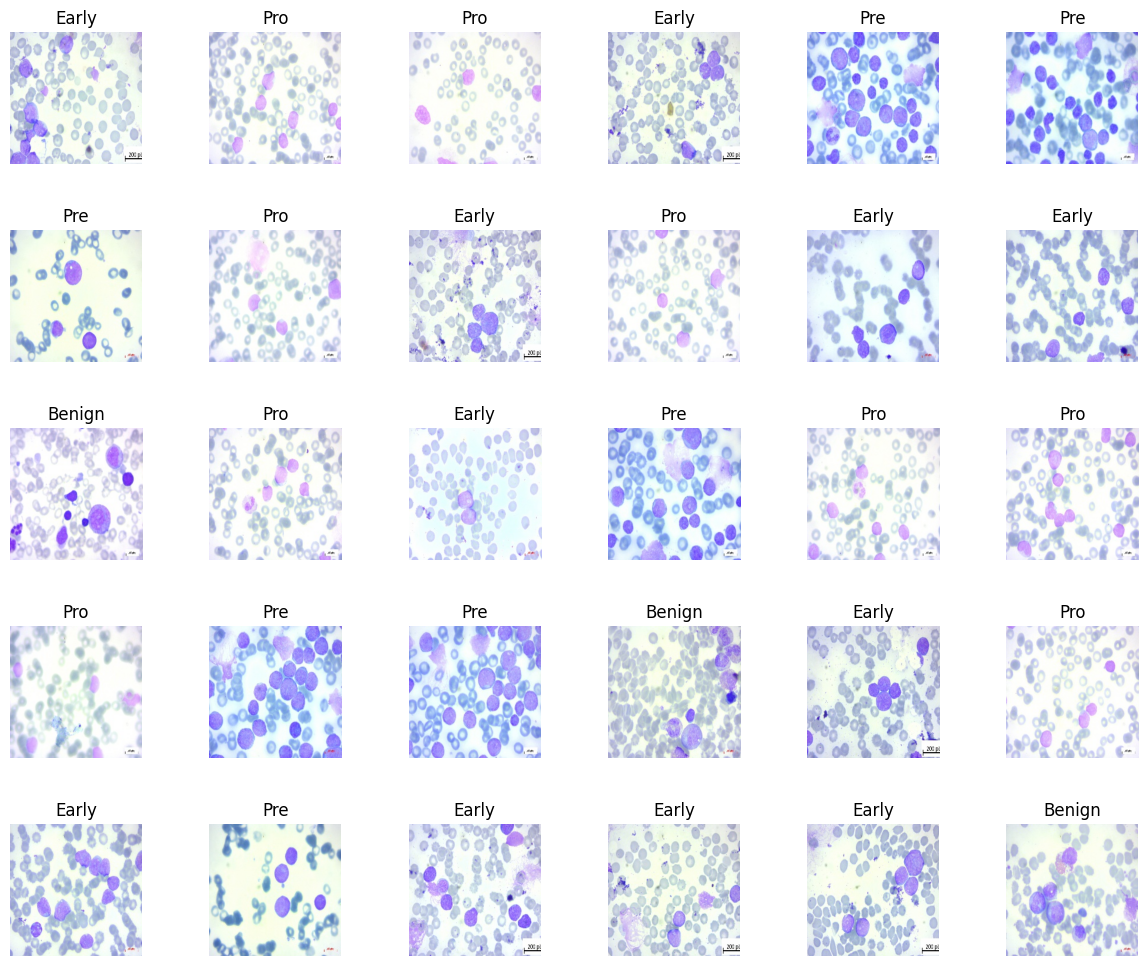

In [11]:
# Inicializa una lista para almacenar nombres de archivos de todas las subcarpetas
nombres_archivos = []

# Itera sobre las subcarpetas y obtén los nombres de archivos
for subcarpeta in os.listdir(ruta_directorio_original):
    ruta_subcarpeta = os.path.join(ruta_directorio_original, subcarpeta)
    if os.path.isdir(ruta_subcarpeta):
        nombres_archivos.extend(os.listdir(ruta_subcarpeta))

# Asegúrate de que haya al menos 30 imágenes disponibles
if len(nombres_archivos) >= 30:
    # Selecciona al azar 30 imágenes de la lista
    imagenes_ejemplo = sample(nombres_archivos, 30)

# Configura el diseño de la figura
    filas, columnas = 5, 6
    figura, ejes = plt.subplots(filas, columnas, figsize=(15, 12))
    figura.subplots_adjust(hspace=0.5)

    # Itera sobre las imágenes de ejemplo y muéstralas en la cuadrícula
    for i, nombre_archivo in enumerate(imagenes_ejemplo):
        # Itera sobre las subcarpetas para encontrar la imagen
        for subcarpeta in os.listdir(ruta_directorio_original):
            ruta_subcarpeta = os.path.join(ruta_directorio_original, subcarpeta)
            ruta_imagen = os.path.join(ruta_subcarpeta, nombre_archivo)
            
            if os.path.isfile(ruta_imagen):
                imagen = cv.imread(ruta_imagen)
                imagen = cv.cvtColor(imagen, cv.COLOR_BGR2RGB)  # Convertir de BGR a RGB para mostrar con matplotlib
                ejes[i // columnas, i % columnas].imshow(imagen)
                ejes[i // columnas, i % columnas].axis('off')
                ejes[i // columnas, i % columnas].set_title(subcarpeta)
                break  # Rompe el bucle una vez que se encuentra la imagen

    plt.show()
else:
    print("No hay suficientes imágenes en las subcarpetas para mostrar 30 ejemplos.")

La función anterior realiza varias operaciones para mostrar una cuadrícula de 30 imágenes seleccionadas al azar de las subcarpetas.

## MODELADO

### Preprocesamiento de imagenes, data aumentation y particion de datos (train/val/test)

In [12]:
# Lista de los archivos y los labels
data = [os.path.join(folder,file) for folder in os.listdir(ruta_directorio_original) for file in os.listdir(os.path.join(ruta_directorio_original, folder))]
labels = [folder for folder in os.listdir(ruta_directorio_original) for file in os.listdir(os.path.join(ruta_directorio_original, folder))]

Esta línea de código crea dos listas, una para los archivos y otra para los labels, donde cada elemento de cada lista es una ruta completa de archivo o etiqueta, respectivamente.

In [13]:
# train-test split
data_temp,data_test, labels_temp,labels_test = train_test_split(data, labels, test_size=0.2, random_state=42)
data_train, data_val, labels_train, labels_val = train_test_split(data_temp, labels_temp, test_size=0.1, random_state=42)

# data generators para aumentacion en train con rescale
datagen = ImageDataGenerator(rescale=1./255,  # rescale pixel a [0,1]
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

train_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': data_train, 'label': labels_train}),
    directory=ruta_directorio_original,
    x_col='filename',
    y_col='label',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'  
)

val_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': data_val, 'label': labels_val}),
    directory=ruta_directorio_original,
    x_col='filename',
    y_col='label',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

# saco la aumentacion para el test
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': data_test, 'label': labels_test}),
    directory=ruta_directorio_original,
    x_col='filename',
    y_col='label',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 2343 validated image filenames belonging to 4 classes.
Found 261 validated image filenames belonging to 4 classes.
Found 652 validated image filenames belonging to 4 classes.


Aca se realiza la división de los datos en conjuntos de entrenamiento, validación y prueba, y luego configura generadores de datos para el aumento de imágenes y la preparación de los datos para el entrenamiento y la evaluación del modelo.

(32, 224, 224, 3)


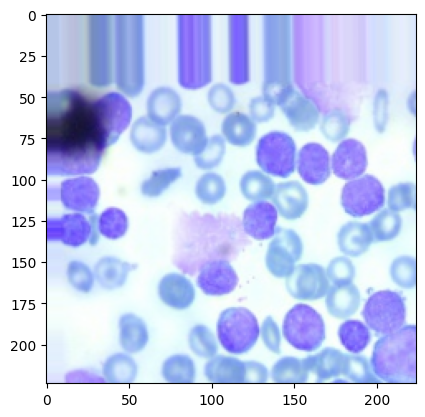

In [14]:
#mostramos una imagen del conjunto de train luego del data aumentation y particion de datos
for img, label in train_generator:
    print(img.shape)
    plt.imshow(img[0])
    break

## Desarrollo de modelos predictivos


### Definiendo Callbacks

Los callbacks son funciones que se ejecutan en etapas específicas del proceso de aprendizaje automático, como la entrenamiento y la validación de un modelo. Estas funciones permiten la personalización y el control de ciertos aspectos del proceso de aprendizaje, como la selección de modelos, la optimización de parámetros, la evaluación de la calidad del modelo y la prevención de la sobreajuste

In [ ]:
# Neptune parameters
parameters = {"dense_units": 4,
              "activation": "relu",
              "batch_size": 32,
              "n_epochs": 20
              }

run["model/parameters"] = parameters

In [17]:
callbacks = [
    EarlyStopping(monitor='val_recall', min_delta=0, patience=8, mode='max'), #detiene el entrenamiento del modelo si la métrica de validación no mejora después de un número determinado de épocas (patience). En este caso, la métrica de validación es la sensibilidad (recall) y el modo es max, lo que significa que el entrenamiento se detendrá si la sensibilidad no mejora después de patience épocas.
    ModelCheckpoint('best_model2.h5', monitor='val_recall', save_best_only=True),#guarda el mejor modelo entrenado durante el entrenamiento, según la métrica de validación especificada. En este caso, la métrica de validación es la sensibilidad (recall) y solo se guarda el modelo si la sensibilidad mejora en comparación con el mejor modelo anterior
    NeptuneCallback(run=run)#se utiliza para integrar el registro y la visualización de los resultados del entrenamiento en la plataforma de Neptune
]

### Compilado y entrenamiento de modelos predictivos. CNN y Resnet

In [18]:
# Definir el modelo CNN
modelo_cnn = Sequential()
modelo_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'))
modelo_cnn.add(MaxPooling2D((2, 2)))
modelo_cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
modelo_cnn.add(MaxPooling2D((2, 2)))
modelo_cnn.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
modelo_cnn.add(MaxPooling2D((2, 2)))
modelo_cnn.add(Flatten())
modelo_cnn.add(Dense(128, activation='relu'))
modelo_cnn.add(Dropout(0.5))
modelo_cnn.add(Dense(4, activation='softmax')) 
modelo_cnn.compile(optimizer='Adam',
                    loss='categorical_crossentropy',
                    metrics=[tf.keras.metrics.Recall()])

# Crear modelo ResNet50 fine tuning de todo el modelo
modelo_resnet = Sequential()
modelo_resnet.add(ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3)))
modelo_resnet.add(MaxPooling2D()) 
modelo_resnet.add(Flatten()) #MLP
modelo_resnet.add(Dropout(0.3))
modelo_resnet.add(Dense(150, activation='relu'))
modelo_resnet.add(Dense(4, activation='softmax'))
modelo_resnet.compile(optimizer=Adam(learning_rate=0.0001), 
                      loss='categorical_crossentropy', 
                      metrics=[tf.keras.metrics.Recall()])

# Entrenar ambos modelos
history_cnn, history_resnet = train_models(modelo_cnn, modelo_resnet, train_generator, val_generator, callbacks)

Epoch 1/50
74/74 [==============================] - 33s 418ms/step - loss: 1.2840 - recall_2: 0.2066 - val_loss: 0.7961 - val_recall_2: 0.5019
Epoch 2/50
74/74 [==============================] - 30s 406ms/step - loss: 0.9160 - recall_2: 0.4452 - val_loss: 0.6812 - val_recall_2: 0.5977
Epoch 3/50
74/74 [==============================] - 30s 409ms/step - loss: 0.7160 - recall_2: 0.5847 - val_loss: 0.4906 - val_recall_2: 0.6935
Epoch 4/50
74/74 [==============================] - 30s 406ms/step - loss: 0.6350 - recall_2: 0.6355 - val_loss: 0.4574 - val_recall_2: 0.6705
Epoch 5/50
74/74 [==============================] - 31s 413ms/step - loss: 0.5687 - recall_2: 0.6795 - val_loss: 0.3837 - val_recall_2: 0.8008
Epoch 6/50
74/74 [==============================] - 30s 407ms/step - loss: 0.5535 - recall_2: 0.7290 - val_loss: 0.5767 - val_recall_2: 0.7586
Epoch 7/50
74/74 [==============================] - 30s 411ms/step - loss: 0.5025 - recall_2: 0.7529 - val_loss: 0.3042 - val_recall_2: 0.8659

In [19]:
modelo_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 28, 28, 128)      

In [20]:
modelo_resnet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 3, 3, 2048)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 18432)             0         
                                                                 
 dropout_3 (Dropout)         (None, 18432)             0         
                                                                 
 dense_6 (Dense)             (None, 150)               2764950   
                                                                 
 dense_7 (Dense)             (None, 4)                 604       
                                                      

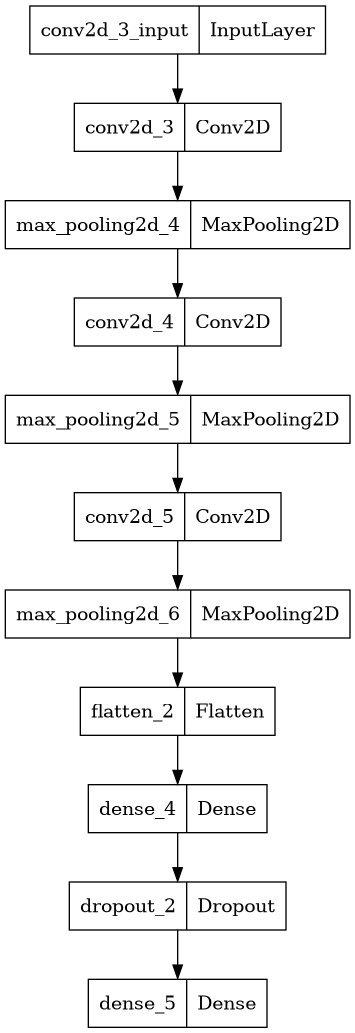

In [21]:
plot_model(modelo_cnn, to_file='/kaggle/working/cnn.png')

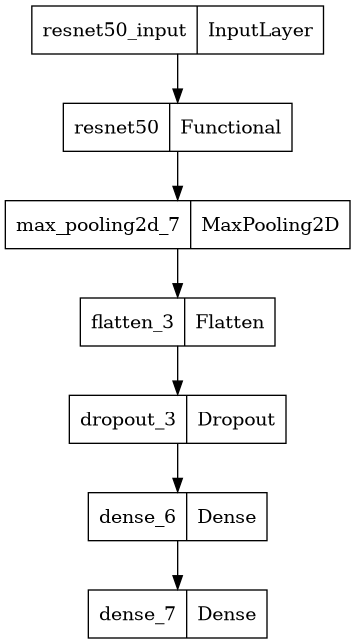

In [22]:
plot_model(modelo_resnet, to_file='/kaggle/working/resnet.png')

### Guardado de modelos entrenados

In [23]:
modelo_cnn.save('/kaggle/working/cnn_model.h5')
modelo_resnet.save('/kaggle/working/resnet_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Evaluación de ambos modelos en validacion 

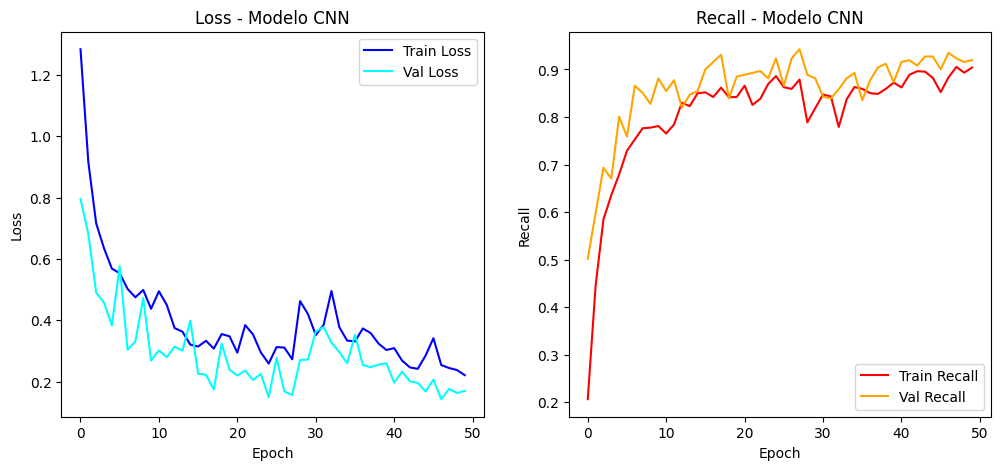

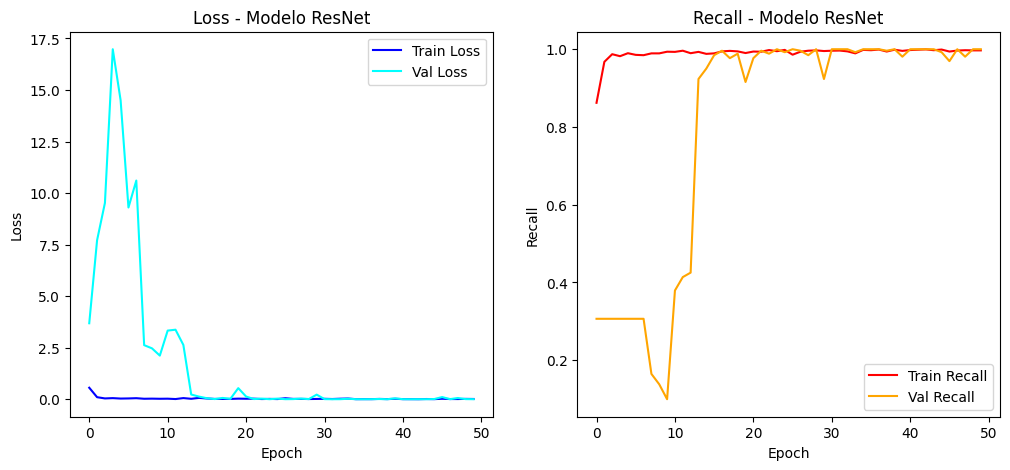

In [24]:
# Gráficas para el primer modelo
plot_model_history(history_cnn, "Modelo CNN")

# Gráficas para el segundo modelo
plot_model_history(history_resnet, "Modelo ResNet")

1/1 [==============================] - 0s 22ms/step


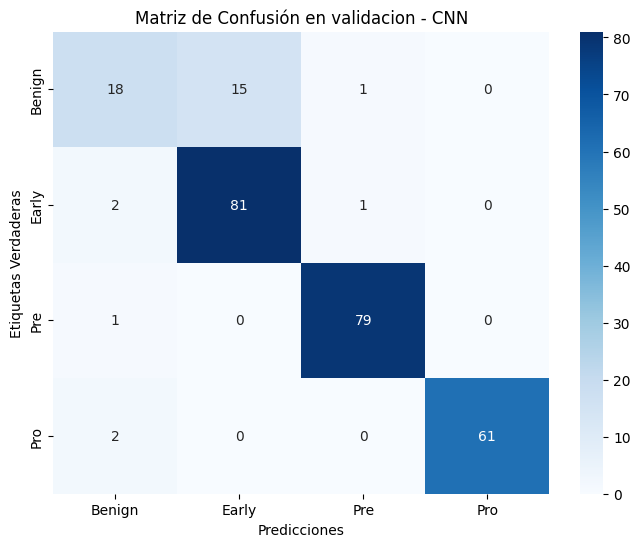

              precision    recall  f1-score   support

      Benign       0.78      0.53      0.63        34
       Early       0.84      0.96      0.90        84
         Pre       0.98      0.99      0.98        80
         Pro       1.00      0.97      0.98        63

    accuracy                           0.92       261
   macro avg       0.90      0.86      0.87       261
weighted avg       0.91      0.92      0.91       261



In [64]:
# Obtener predicciones en el conjunto de prueba usando el generador de flujo de datos para ResNet
y_pred_cnn = []
y_true_cnn = []

# Iterar sobre el generador de flujo de datos para obtener todas las predicciones y etiquetas verdaderas para CNN
for i in range(len(val_generator)):
    batch_images, batch_labels = val_generator[i]
    batch_pred = modelo_cnn.predict(batch_images)  # Usar el modelo cnn para las predicciones
    y_pred_cnn.extend(np.argmax(batch_pred, axis=1))
    y_true_cnn.extend(np.argmax(batch_labels, axis=1))

# Convertir las listas a arrays
y_pred_cnn = np.array(y_pred_cnn)
y_true_cnn = np.array(y_true_cnn)

# Obtener la matriz de confusión para cnn
conf_matrix_cnn = confusion_matrix(y_true_cnn, y_pred_cnn)

# Visualizar la matriz de confusión para cnn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=subcarpetas, yticklabels=subcarpetas)
plt.title('Matriz de Confusión en validacion - CNN')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')
plt.show()

# Imprimir el reporte de clasificación para CNN
print(classification_report(y_true_cnn, y_pred_cnn, target_names=subcarpetas))

1/1 [==============================] - 0s 27ms/step


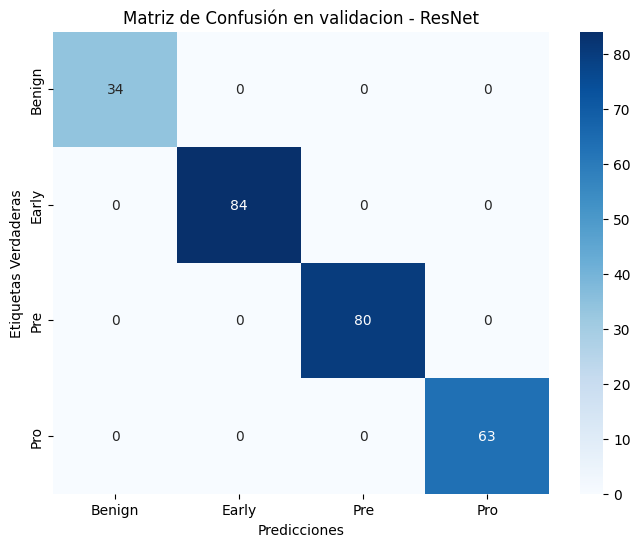

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        34
       Early       1.00      1.00      1.00        84
         Pre       1.00      1.00      1.00        80
         Pro       1.00      1.00      1.00        63

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261



In [62]:
# Obtener predicciones en el conjunto de validacion usando el generador de flujo de datos para ResNet
y_pred_resnet = []
y_true_resnet = []

# Iterar sobre el generador de flujo de datos para obtener todas las predicciones y etiquetas verdaderas para ResNet
for i in range(len(val_generator)):
    batch_images, batch_labels = val_generator[i]
    batch_pred = modelo_resnet.predict(batch_images)  # Usar el modelo ResNet para las predicciones
    y_pred_resnet.extend(np.argmax(batch_pred, axis=1))
    y_true_resnet.extend(np.argmax(batch_labels, axis=1))

# Convertir las listas a arrays
y_pred_resnet = np.array(y_pred_resnet)
y_true_resnet = np.array(y_true_resnet)

# Obtener la matriz de confusión para ResNet
conf_matrix_resnet = confusion_matrix(y_true_resnet, y_pred_resnet)

# Visualizar la matriz de confusión para ResNet
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_resnet, annot=True, fmt='d', cmap='Blues', xticklabels=subcarpetas, yticklabels=subcarpetas)
plt.title('Matriz de Confusión en validacion - ResNet')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')
plt.show()

# Imprimir el reporte de clasificación para ResNet
print(classification_report(y_true_resnet, y_pred_resnet, target_names=subcarpetas))

## Seleccion del modelo

Las graficas de perdida y recall permiten observar como el modelo ResNet alcanza una menor perdida y mayor recall en epocas mas tempranas del entrenamiento.
Por otra parte, evaluando las matrices de confusion de ambos modelos apreciamos que el modelo ResNet no confunde ninguna de las cuatro categorias y tiene un 100% de precision, recall, y F1-score en validacion para todas las clases. Por otro lado, el modelo CNN, si bien sus metricas de precision, recall y F1-score para los 3 estadios de la leucemia (Early, Pre, y Pro), dieron en torno al 90% tiende a confundir casos benignos con el estadio temprano de la enfermedad y las metricas para distinguir casos benignos dieron muy bajas. 
Observando la accuracy de ambos modelos, el modelo ResNet alcanzo el 100% en validacion, mientras que el CNN en torno a un 90%.
Es por estos motivos que se decidio continuar con el modelo ResNet para realizar la evaluacion en test.

## Evaluacion del modelo ResNet en test 

### Recall y perdida en test

In [28]:
test_loss, test_recall = modelo_resnet.evaluate(test_generator)
print(f'Test recall: {test_recall:.2f}, Test loss: {test_loss:.2f}')

21/21 [==============================] - 3s 128ms/step - loss: 0.0139 - recall_3: 0.9969
Test recall: 1.00, Test loss: 0.01


In [29]:
run["evaluation/recall"] = test_recall
run["evaluation/loss"] = test_loss
model_version["model"].upload("/kaggle/working/resnet_model.h5")

NameError: name 'run' is not defined

1/1 [==============================] - 0s 26ms/step


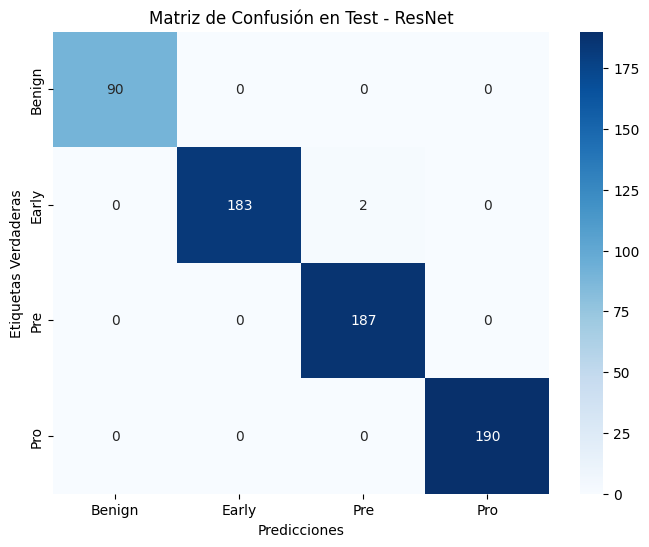

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        90
       Early       1.00      0.99      0.99       185
         Pre       0.99      1.00      0.99       187
         Pro       1.00      1.00      1.00       190

    accuracy                           1.00       652
   macro avg       1.00      1.00      1.00       652
weighted avg       1.00      1.00      1.00       652



In [30]:
# Obtener predicciones en el conjunto de prueba usando el generador de flujo de datos para ResNet
y_pred_resnet_test = []
y_true_resnet_test = []

# Iterar sobre el generador de flujo de datos para obtener todas las predicciones y etiquetas verdaderas para ResNet
for i in range(len(test_generator)):
    batch_images, batch_labels = test_generator[i]
    batch_pred = modelo_resnet.predict(batch_images)  # Usar el modelo ResNet para las predicciones
    y_pred_resnet_test.extend(np.argmax(batch_pred, axis=1))
    y_true_resnet_test.extend(np.argmax(batch_labels, axis=1))

# Convertir las listas a arrays
y_pred_resnet_test = np.array(y_pred_resnet_test)
y_true_resnet_test = np.array(y_true_resnet_test)

# Obtener la matriz de confusión para ResNet
conf_matrix_resnet_test = confusion_matrix(y_true_resnet_test, y_pred_resnet_test)

# Visualizar la matriz de confusión para ResNet
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_resnet_test, annot=True, fmt='d', cmap='Blues', xticklabels=subcarpetas, yticklabels=subcarpetas)
plt.title('Matriz de Confusión en Test - ResNet')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')
plt.show()

# Imprimir el reporte de clasificación para ResNet
print(classification_report(y_true_resnet_test, y_pred_resnet_test, target_names=subcarpetas))

In [ ]:
##estas curvas roc no estan dando bien
#preguntar si los callbacks se guardan la mejor epoca o no

21/21 [==============================] - 2s 97ms/step


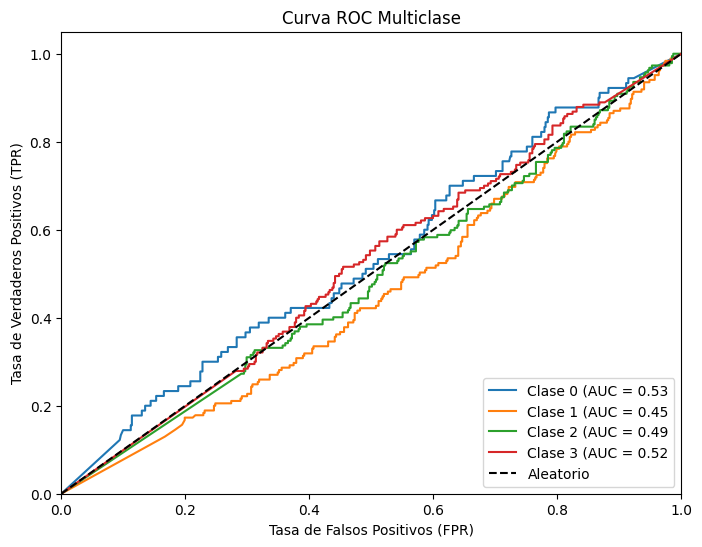

In [41]:
# Obtén las probabilidades predichas para cada clase usando el generador de flujo de datos
y_prob = modelo_resnet.predict(test_generator)

# Binariza las etiquetas (one-hot encoding)
y_true_bin_test = label_binarize(y_true_resnet_test, classes=[0, 1, 2, 3])  # Asegúrate de haber definido previamente y_true

# Inicializa las variables para almacenar las tasas TPR y FPR para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calcula las tasas TPR y FPR para cada clase
for i in range(4):  # 4 clases en tu caso
    fpr[i], tpr[i], _ = roc_curve(y_true_bin_test[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tamaño de la figura
plt.figure(figsize=(8, 6))

# Plotea las curvas ROC para cada clase
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f}')

# Configuración de la figura
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Multiclase')
plt.legend(loc="lower right")
plt.show()

21/21 [==============================] - 2s 101ms/step


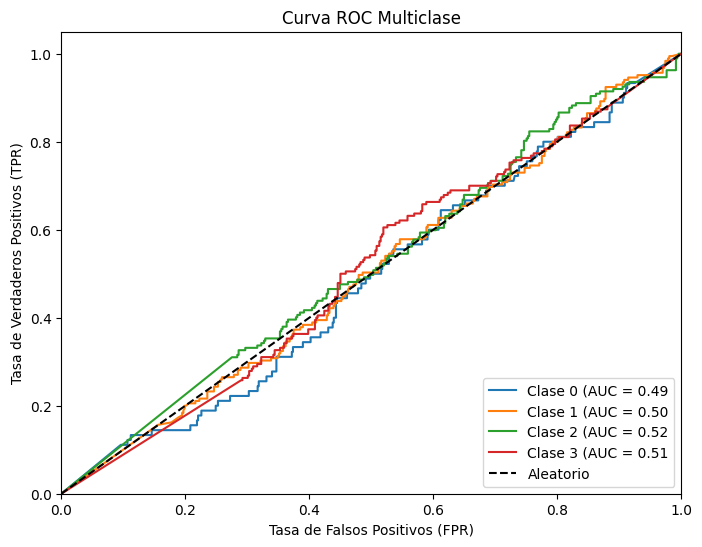

In [46]:
# Obtén las probabilidades predichas para cada clase usando el generador de flujo de datos
y_prob = modelo_resnet.predict(test_generator)

# Binariza las etiquetas (one-hot encoding)
y_true_bin = label_binarize(y_true_resnet_test, classes=[0, 1, 2, 3])  # Asegúrate de haber definido previamente y_true

# Inicializa las variables para almacenar las tasas TPR y FPR para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calcula las tasas TPR y FPR para cada clase
for i in range(4):  # 4 clases en tu caso
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tamaño de la figura
plt.figure(figsize=(8, 6))

# Plotea las curvas ROC para cada clase
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f}')

# Configuración de la figura
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Multiclase')
plt.legend(loc="lower right")
plt.show()

## Visualizacion de regiones en las imagenes que contribuyen a la toma de decision en el Modelo ResNet utilizando la herramienta GradCam

In [57]:
# para ver varias imagenes juntas 
# Instantiation of the explainer - GradCam()
explainer = GradCAM()  # Asegúrate de que GradCAM esté correctamente definido en tu código
index = 5

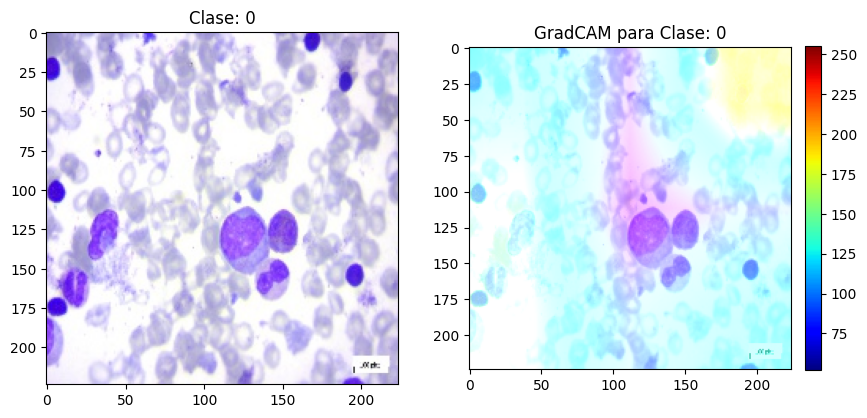

In [60]:
#para ver de a una imagen
# Obtener la imagen y su explicación GradCAM
index=3
img = test_generator[index][0][img_index]
label = int(np.argmax(test_generator[index][1][img_index]))
img_to_explain = np.expand_dims(img, 0)
output = explainer.explain(validation_data=[img_to_explain, None], model=modelo_resnet, class_index=label)

# Crear la figura y las subfiguras
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Mostrar la imagen original en la primera subfigura
ax[0].imshow(img, cmap='gray')
ax[0].set_title(f'Clase: {label}')

# Mostrar la explicación GradCAM en la segunda subfigura
im = ax[1].imshow(output, cmap='jet')
ax[1].set_title(f'GradCAM para Clase: {label}')

# Agregar la barra de colores personalizada a la derecha de la segunda subfigura
cbar = fig.colorbar(im, ax=ax[1], fraction=0.046, pad=0.04)

plt.show()

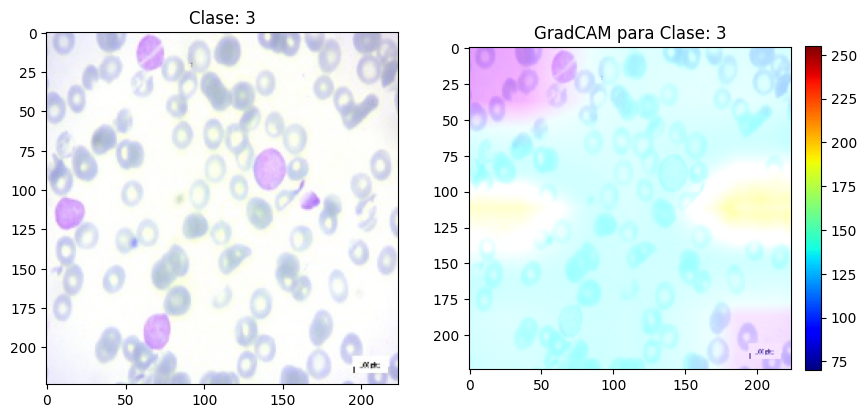

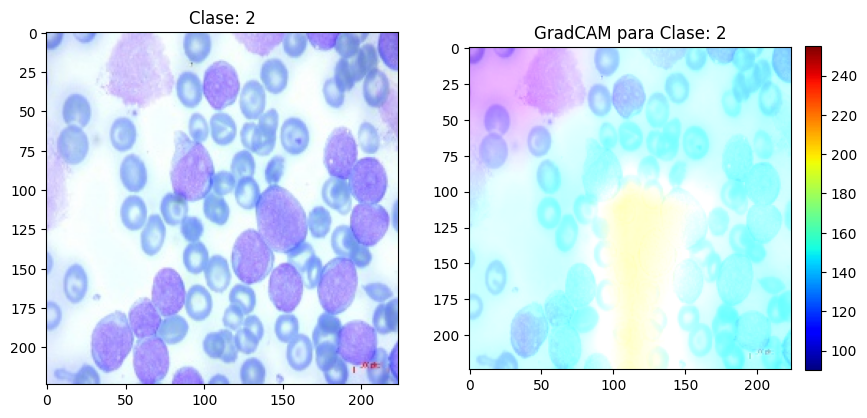

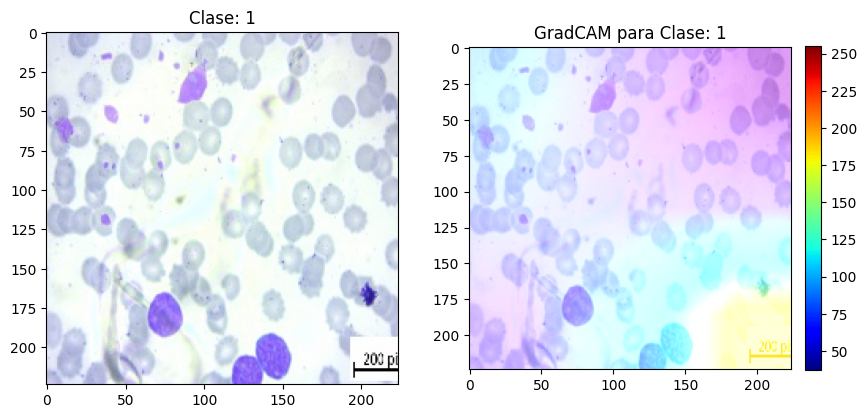

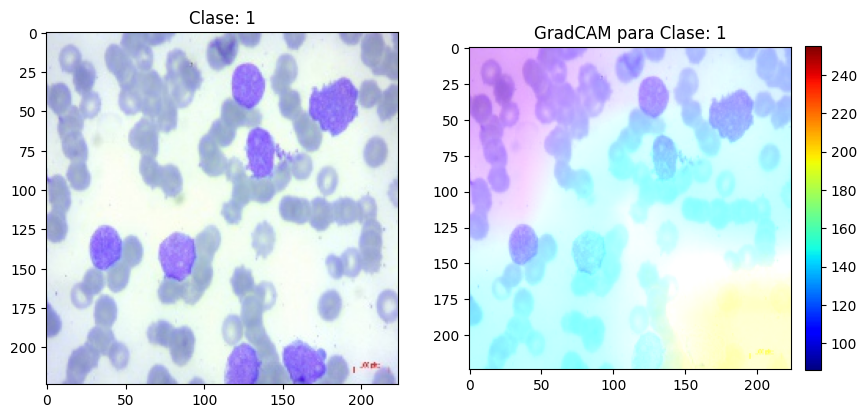

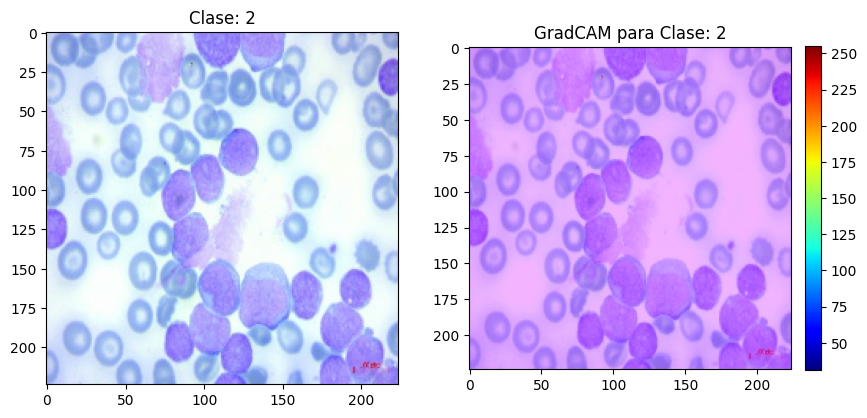

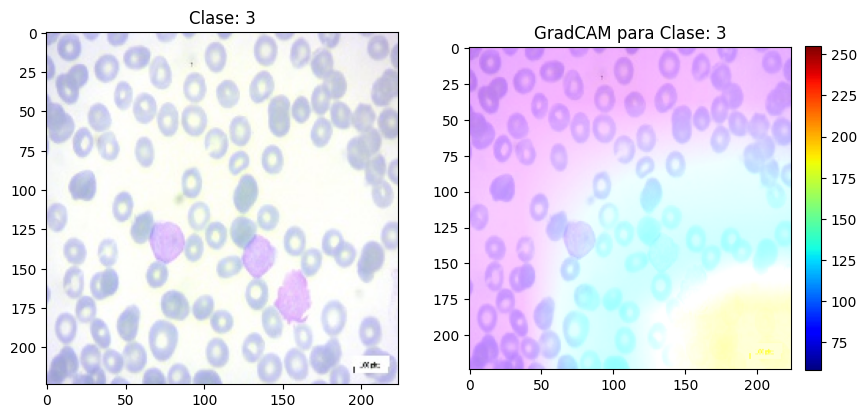

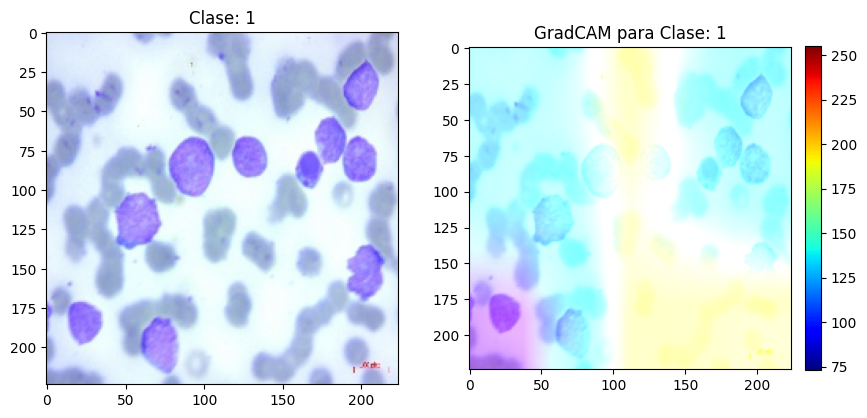

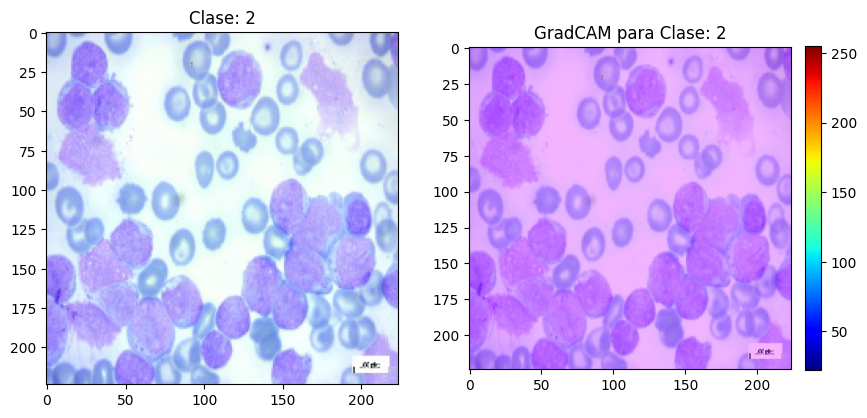

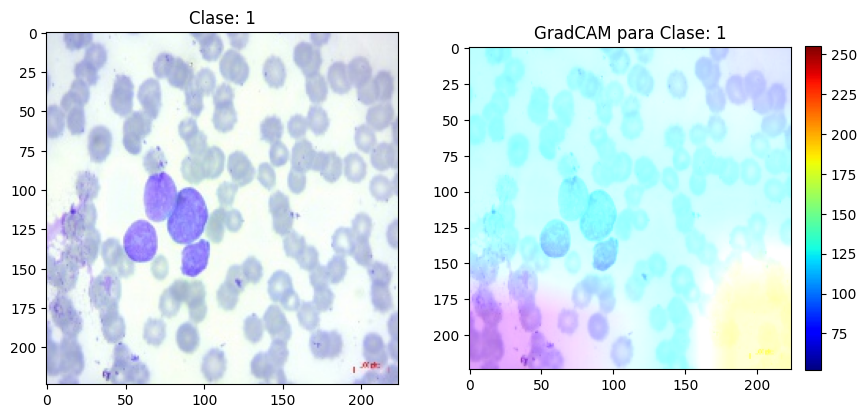

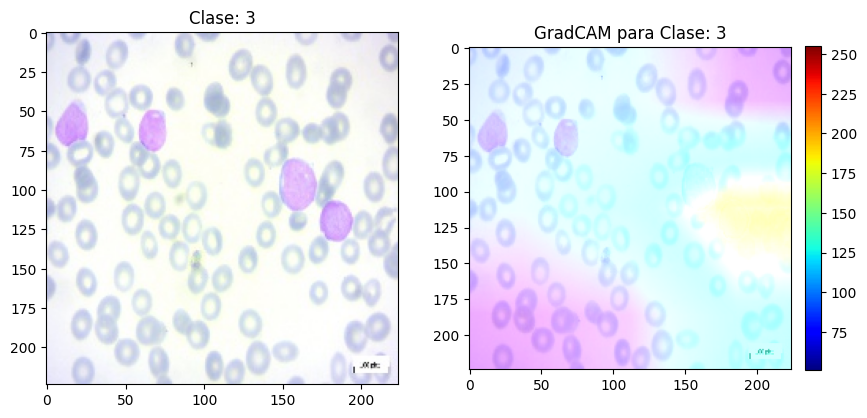

In [58]:
# Iterar sobre los índices de la muestra
for img_index in range(10):
    # Obtener la etiqueta (clase) de la imagen
    label = int(np.argmax(test_generator[index][1][img_index]))

    # Expandir las dimensiones de la imagen para que coincida con las expectativas de la red
    img_to_explain = np.expand_dims(test_generator[index][0][img_index], 0)

    # Llamada al método explain()
    output = explainer.explain(validation_data=[img_to_explain, None], model=modelo_resnet, class_index=label)

    # Crear una nueva figura para cada par de imagen y explicación GradCAM
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Mostrar la imagen original en la primera subfigura
    im0 = ax[0].imshow(test_generator[index][0][img_index], cmap='gray')
    ax[0].set_title(f'Clase: {label}')

    # Mostrar la explicación GradCAM en la segunda subfigura
    im1 = ax[1].imshow(output, cmap='jet')
    ax[1].set_title(f'GradCAM para Clase: {label}')

    # Agregar una barra de colores a la derecha de la segunda subfigura
    cbar = fig.colorbar(im1, ax=ax[1], fraction=0.046, pad=0.04)
    plt.show()

--------

## Conclusión

Se logro desarrollar un modelo CNN que permite clasificar la leucemia linfocitica aguda de tipo B y distinguirla de casos benignos con un 86% de recall en promedio para las cuatro clases en validacion.

Se logro desarrollar un modelo con transfer learning a partir de una red preentrenada ResNet50 que permite clasificar la leucemia linfocitica aguda de tipo B y distinguirla de casos benignos con 100 % de recall y accuracy en test.

Se complemento el modelo seleccionado con la herramienta GradCam que permite mostrar las zonas de la imagen relevantes para la clasificacion.

Al comparar el modelo CNN con la red preentrenada ResNet, podemos observar que la CNN si bien no alcanzo las metricas del modelo ResNet, obtuvo una muy buena performance para la relativa simplicidad de su arquitectura. Como perspectiva es posible seguir modificando la arquitectura de esta red en busqueda de mejorar las metricas y que sea un modelo mas fiable para el daignostico de esta enfermedad.

Las herramientas aqui desarrolladas son  de gran utilidad para complementar y apoyar las herramientas clasicas empleadas en el diagnostico de la leucemia linfocitica aguda de tipo B.
